In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import seaborn as sns

## Calculations for the Inverse probability problem discussed in Chapter 3 of "The Book of Why" by Mackenzie and Pearl.
### WHERE IS MY BAG? FROM AACHEN TO ZANZIBAR
"Suppose you’ve just landed in Zanzibar after making a tight connection in
Aachen, and you’re waiting for your suitcase to appear on the carousel. Other
passengers have started to get their bags, but you keep waiting… and
waiting… and waiting. What are the chances that your suitcase did not
actually make the connection from Aachen to Zanzibar? The answer depends,
of course, on how long you have been waiting. If the bags have just started to
show up on the carousel, perhaps you should be patient and wait a little bit
longer. If you’ve been waiting a long time, then things are looking bad."  (MacKenzie & Pearl, "The Book of Why", 2018)

In [2]:
df = pd.read_csv('Table Bag.CSV')
df

,bag on plane,time elapsed,carousel = false,carousel = true
0,False,0,100,0
1,False,1,100,0
2,False,2,100,0
3,False,3,100,0
4,False,4,100,0
5,False,5,100,0
6,False,6,100,0
7,False,7,100,0
8,False,8,100,0
9,False,9,100,0


  B = Bag on plane
  
  P(B) = probability bag on plane /prior_prob_b<sup>1</sup>
 
  P(C) = probability bag on carousel
  
  P(C') = probability bag not on carousel/ c_complement
  
  P(C'|B) = probability bag not on carousel given bag on plane/ c_complement_conditional
  
  **P(B|C') = probability bag on plane given bag not on carousel**<sup>2</sup>



  <sup>1</sup>_prior belief_
  
  <sup>2</sup>_updated belief_

  
  ### P(B|C') = P(C'|B)*P(B)/P(C')
  
  #### * t = 0 ->  P(B|C') = 1*0.5 / 1 = 0.5*
  #### *t = 1 ->  P(B|C') = 0.9*0.5 / 0.95 = 0.47*
  
  

"This table, though large, should be easy to understand. The first eleven
rows say that if your bag didn’t make it onto the plane (bag on plane = false)
then, no matter how much time has elapsed, it won’t be on the carousel
(carousel = false). That is, P(carousel = false | bag on plane = false) is 100
percent. That is the meaning of the 100s in the first eleven rows.
The other eleven rows say that the bags are unloaded from the plane at a
steady rate. If your bag is indeed on the plane, there is a 10 percent
probability it will be unloaded in the first minute, a 10 percent probability in
the second minute, and so forth. For example, after 5 minutes there is a 50
percent probability it has been unloaded, so we see a 50 for P(carousel = true
| bag on plane = true, time = 5). After ten minutes, all the bags have been
unloaded, so P(carousel = true | bag on plane = true, time = 10) is 100
percent. Thus we see a 100 in the last entry of the table."  (MacKenzie & Pearl, "The Book of Why", 2018)

In [3]:
c_complement_list = []
c_complement_conditional_list = []
updated_p_bag = []
prior_prob_b = 0.5

for i in range(len(df['bag on plane'])):
    if (df['bag on plane'][i]) == True:
        #print(df['carousel = false'][i])
        c_complement = ((df['carousel = false'][i])+ (df['carousel = false'][i-10]))/2
        c_complement_list.append(c_complement)
        #print(c_complement)
        c_complement_conditional = df['carousel = false'][i]
        #print(c_complement_conditional)
        c_complement_conditional_list.append(c_complement_conditional)
        prob_b_given_c_complement = (c_complement_conditional*prior_prob_b)/c_complement
        #print(prob_b_given_c)
        updated_p_bag.append(str(prob_b_given_c_complement))

In [4]:
t = range(11)
x = {'p_bag_on_plane':updated_p_bag}
time = {'time':t}

df_inverse_probability = pd.DataFrame(time)
df_inverse_probability['p_bag_on_plane'] = updated_p_bag
df_inverse_probability = df_inverse_probability.astype(float)

#### "The most interesting thing to do with this Bayesian network, as with most Bayesian networks, is to solve the _inverse-probability problem:_
if x minutes have passed and I still haven’t gotten my bag, what is the probability that it
was on the plane? Bayes’s rule automates this computation and reveals an
interesting pattern. **After one minute, there is still a 47 percent chance that it
was on the plane. (Remember that our prior assumption was a 50 percent
probability.) After five minutes, the probability drops to 33 percent. After ten
minutes, of course, it drops to zero** (MacKenzie & Pearl, "The Book of Why", 2018)

In [5]:
df_inverse_probability

,time,p_bag_on_plane
0,0.0,0.500000
1,1.0,0.473684
2,2.0,0.444444
3,3.0,0.411765
4,4.0,0.375000
5,5.0,0.333333
6,6.0,0.285714
7,7.0,0.230769
8,8.0,0.166667
9,9.0,0.090909


Text(0,0.5,"Probability that the bag is on the plane P(B|C')")

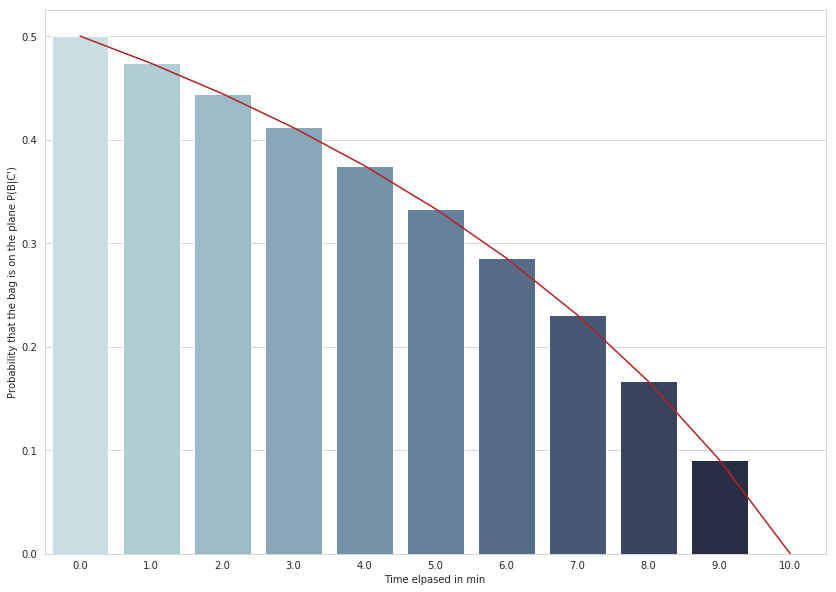

In [6]:
sns.set_style('whitegrid')


plt.figure(figsize=(14,10))

#sns.barplot(y = dfx['dBFS'], x = dfx['frequency'])
sns.despine()


sns.lineplot(x = df_inverse_probability['time'], y = df_inverse_probability['p_bag_on_plane'],
             color='firebrick', alpha = 1)
sns.barplot(x = df_inverse_probability['time'], y = df_inverse_probability['p_bag_on_plane'],
            palette=("ch:3.0,-.2,dark=.1"), alpha = 1)
plt.xlabel('Time elpased in min')
plt.ylabel("Probability that bag on plane given bag not on carouselP(B|C')")

In [7]:
 
def inverse_probability(a_complement, a_complement_conditional, prior_probability_b):
    """function for calulating the inverse probability given the probability not A" P(A'),
    the probability "not A" given B P(A'|B) & prior probability for event B P(B)""" 
    
    updated_prob_b = (a_complement_conditional*prior_probability_b)/a_complement
    return updated_prob_b
    
inverse_probability(95.0,90,0.5)

0.47368421052631576